<a href="https://colab.research.google.com/github/quotation3/project/blob/master/%ED%95%9C%EA%B5%AD%EC%9D%80%ED%96%89%EB%85%BC%EB%AC%B8%EA%B5%AC%ED%98%84_tone%EB%B3%84%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EB%B6%84%EC%84%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [88]:
all_tone = pd.read_csv('/content/drive/My Drive/Colab Notebooks/(All)tone_doc.csv')
mpb_news_tone = pd.read_csv('/content/drive/My Drive/Colab Notebooks/(BoK_News)tone_doc.csv')
mpb_tone = pd.read_csv('/content/drive/My Drive/Colab Notebooks/(BoK)tone_doc.csv')
rate = pd.read_csv('/content/drive/My Drive/Colab Notebooks/policy_rate.csv')

In [89]:
# 데이터 전처리
rate = rate.drop([0,1,2,3])
rate.columns=['date','Rate']
all_tone.columns=['date','ALL_TONE']
all_tone['date'] = pd.to_datetime(all_tone['date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
mpb_news_tone.columns=['date','MPB_NEWS_TONE']
mpb_news_tone['date'] = pd.to_datetime(mpb_news_tone['date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')
mpb_tone.columns=['date','MPB_TONE']
mpb_tone['date'] = pd.to_datetime(mpb_tone['date'], format = "%Y%m%d").dt.strftime('%Y-%m-%d')

In [90]:
# 데이터 병합
tone1 = pd.merge(all_tone, rate, on='date', how='inner')
tone2 = pd.merge(tone1, mpb_news_tone , on='date', how='inner')
tone_final = pd.merge(tone2, mpb_tone, on='date', how='inner')

In [91]:
tone_final = tone_final[['date', 'Rate', 'ALL_TONE', 'MPB_NEWS_TONE', 'MPB_TONE']]
tone_final

,date,Rate,ALL_TONE,MPB_NEWS_TONE,MPB_TONE
0,2005-05-12,3.25,-0.166667,-0.230769,0.818182
1,2005-06-09,3.25,0.111111,0.111111,0.500000
2,2005-07-07,3.25,0.142857,0.333333,-0.714286
3,2005-08-11,3.25,0.600000,0.625000,1.000000
4,2005-09-08,3.25,0.333333,0.333333,0.571429
...,...,...,...,...,...
156,2019-02-28,1.75,-0.428571,-0.368421,0.600000
157,2019-04-18,1.75,0.040000,0.040000,0.230769
158,2019-05-31,1.75,-0.120000,-0.040000,0.357143
159,2019-07-18,1.50,-0.360000,-0.320000,-0.785714


In [92]:
tone_final.corr()

,Rate,ALL_TONE,MPB_NEWS_TONE,MPB_TONE
Rate,1.000000,0.512576,0.496704,0.354033
ALL_TONE,0.512576,1.000000,0.964687,0.676288
MPB_NEWS_TONE,0.496704,0.964687,1.000000,0.691521
MPB_TONE,0.354033,0.676288,0.691521,1.000000


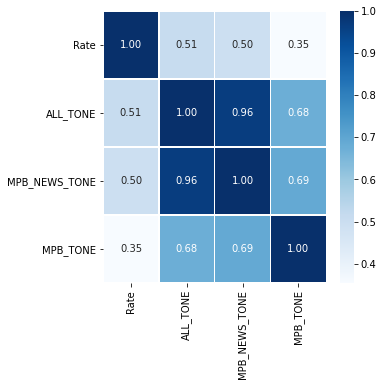

In [93]:
plt.figure(figsize=(5,5))
sns.heatmap(data = tone_final.corr(),
            annot=True,
            fmt = '.2f' ,
            linewidths=.5,
            cmap='Blues')

plt.savefig('full_corrplot.png')

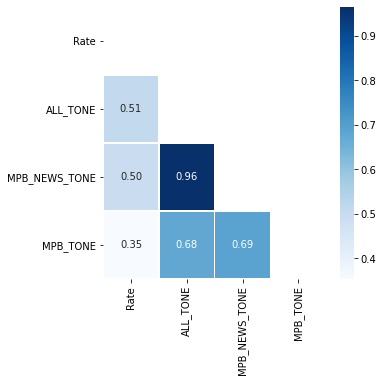

<Figure size 432x288 with 0 Axes>

In [94]:
mask = np.zeros_like(tone_final.corr(), dtype=np.bool)  # 하삼각만 남기기 위해 가릴 부분 지정
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(5,5))

sns.heatmap(data = tone_final.corr(),
            annot=True, # 상관계수 값을 표시
            fmt = '.2f',    # 표시값 포맷 설정
            linewidths=.5,  # 경계면 실선으로 구분
            mask=mask,  # 표시하지 않을 mask 부분 지정
            cmap='Blues'    # 색상 설정
            )
plt.show()

plt.savefig('diagonal_corrplot.png')